In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('int_online_tx.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
35111,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
35112,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
35113,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
35114,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
35115,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [9]:
df.shape

(35116, 8)

In [11]:
len(df.InvoiceNo.unique())

1591

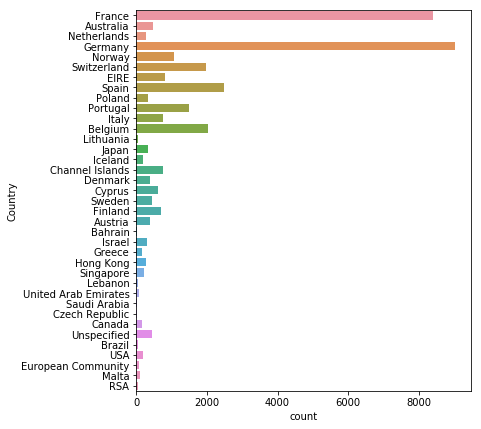

In [13]:
plt.figure(figsize=(6,7))
sns.countplot(y = 'Country',data =df)
plt.show()

In [14]:
#transactionlevelcleaning
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

In [20]:
df = df[df.CustomerID.notnull()]

In [21]:
df['CustomerID'] = df.CustomerID.astype(int)
df.CustomerID.head()

0    12583
1    12583
2    12583
3    12583
4    12583
Name: CustomerID, dtype: int32

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France


In [24]:
df['sales'] = df.Quantity*df.UnitPrice

In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6


In [26]:
df.to_csv('cleaned_transaction.csv',index =None)

In [32]:
invoice_data = df.groupby('CustomerID').InvoiceNo.agg({'total_transactions': 'nunique'})
invoice_data.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8


In [34]:
product_data = df.groupby('CustomerID').StockCode.agg({'total_products': 'count','total_unique_products': 'nunique'})

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [35]:
product_data.head()

,total_products,total_unique_products
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


In [37]:
sales_data = df.groupby('CustomerID').sales.agg({'total_sales':'sum','avg_product_value':'mean'})

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [38]:
sales_data.head()

,total_sales,avg_product_value
CustomerID,,
12347,4310.00,23.681319
12348,1797.24,57.975484
12349,1757.55,24.076027
12350,334.40,19.670588
12352,2506.04,29.482824


In [39]:
cart_data = df.groupby(['CustomerID','InvoiceNo']).sales.agg({'cart_value':'sum'})

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [40]:
cart_data.reset_index(inplace = True)

In [41]:
cart_data.head()

,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91


In [42]:
agg_cart_data = cart_data.groupby('CustomerID').cart_value.agg({'avg_cart_value':'mean','min_cart_value':'min','max_cart_value':'max'})

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [45]:
customer_df = invoice_data.join([product_data,sales_data,agg_cart_data])
customer_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


In [46]:
customer_df.to_csv('abt3.csv')

In [47]:
tx_df = pd.read_csv('cleaned_transaction.csv')

In [48]:
tx_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6


In [49]:
tx_df[['StockCode','Description']].head()

,StockCode,Description
0,22728,ALARM CLOCK BAKELIKE PINK
1,22727,ALARM CLOCK BAKELIKE RED
2,22726,ALARM CLOCK BAKELIKE GREEN
3,21724,PANDA AND BUNNIES STICKER SHEET
4,21883,STARS GIFT TAPE


In [50]:
len(tx_df.StockCode.unique())

2574

In [51]:
toy_df = tx_df[tx_df.CustomerID.isin([14566,17844])]
toy_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
19250,563900,85099C,JUMBO BAG BAROQUE BLACK WHITE,200,8/21/11 11:05,1.79,14566,Channel Islands,358.00
19251,563900,85099B,JUMBO BAG RED RETROSPOT,200,8/21/11 11:05,1.79,14566,Channel Islands,358.00
19252,563900,23199,JUMBO BAG APPLES,200,8/21/11 11:05,1.79,14566,Channel Islands,358.00
19253,563900,22386,JUMBO BAG PINK POLKADOT,200,8/21/11 11:05,1.79,14566,Channel Islands,358.00
19851,564428,21993,FLORAL FOLK STATIONERY SET,12,8/25/11 11:27,1.25,17844,Canada,15.00
19852,564428,23295,SET OF 12 MINI LOAF BAKING CASES,8,8/25/11 11:27,0.83,17844,Canada,6.64
19853,564428,23293,SET OF 12 FAIRY CAKE BAKING CASES,16,8/25/11 11:27,0.83,17844,Canada,13.28
19854,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,8/25/11 11:27,1.25,17844,Canada,10.00
19855,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,8/25/11 11:27,0.83,17844,Canada,6.64


In [52]:
toy_item_dummies = pd.get_dummies(toy_df.StockCode)
toy_item_dummies['CustomerID'] = toy_df.CustomerID
toy_item_dummies

,21993,22386,23199,23293,23294,23295,23296,85099B,85099C,CustomerID
19250,0,0,0,0,0,0,0,0,1,14566
19251,0,0,0,0,0,0,0,1,0,14566
19252,0,0,1,0,0,0,0,0,0,14566
19253,0,1,0,0,0,0,0,0,0,14566
19851,1,0,0,0,0,0,0,0,0,17844
19852,0,0,0,0,0,1,0,0,0,17844
19853,0,0,0,1,0,0,0,0,0,17844
19854,0,0,0,0,0,0,1,0,0,17844
19855,0,0,0,0,1,0,0,0,0,17844


In [53]:
toy_item_data = toy_item_dummies.groupby('CustomerID').sum()
toy_item_data

,21993,22386,23199,23293,23294,23295,23296,85099B,85099C
CustomerID,,,,,,,,,
14566,0,1,1,0,0,0,0,1,1
17844,1,0,0,1,1,1,1,0,0


In [54]:
item_dummies = pd.get_dummies(tx_df.StockCode)
item_dummies['CustomerID'] = tx_df.CustomerID
item_dummies.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST,CustomerID
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583


In [55]:
item_dummies.shape

(33698, 2575)

In [56]:
item_data =item_dummies.groupby('CustomerID').sum()
item_data.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85231B,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5


In [57]:
item_data.shape

(414, 2574)

In [58]:
item_data.sum()

10002        12
10120         1
10125        13
10133         5
10135         4
11001         8
15034         5
15036        19
15039         3
15044A        6
15044B        3
15044C        2
15044D        4
15056BL      50
15056N       35
15056P       24
15058A        9
15058B        8
15058C        4
15060B       12
16008        11
16011         3
16012         4
16014        10
16016        16
16045         8
16048         8
16054         2
16156L        6
16156S       12
           ... 
90098         1
90099         2
90108         1
90114         1
90120B        1
90145         2
90160A        1
90160B        1
90160C        1
90160D        1
90161B        1
90161C        1
90161D        1
90162A        1
90162B        1
90164A        1
90170         1
90173         1
90184B        1
90184C        1
90192         1
90201A        1
90201B        3
90201C        2
90201D        1
90202D        1
90204         1
C2            6
M            34
POST       1055
Length: 2574, dtype: int

In [59]:
item_data.to_csv('item_data.csv')

In [64]:
item_data.sum().sort_values().tail(20)

22961      114
22630      115
22139      117
21080      122
85099B     123
20726      123
20719      128
20750      132
23084      140
20725      141
21212      143
22551      158
22629      160
22328      166
21731      169
22556      179
22554      197
22423      222
22326      271
POST      1055
dtype: int64

In [65]:
top_20_items = item_data.sum().sort_values().tail(20).index
print(top_20_items)

Index(['22961', '22630', '22139', '21080', '85099B', '20726', '20719', '20750',
       '23084', '20725', '21212', '22551', '22629', '22328', '21731', '22556',
       '22554', '22423', '22326', 'POST'],
      dtype='object')


In [67]:
top_20_item_data = item_data[top_20_items]
top_20_item_data.shape

(414, 20)

In [68]:
top_20_item_data.head()

,22961,22630,22139,21080,85099B,20726,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
12350,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
12352,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5


In [69]:
top_20_item_data.to_csv('threshold_item_data.csv')

In [70]:
#PCA
from sklearn.preprocessing import StandardScaler

In [71]:
from sklearn.decomposition import PCA

In [72]:
item_data = pd.read_csv('item_data.csv',index_col =0)

In [73]:
item_data.shape

(414, 2574)

In [74]:
np.random.seed(101)
x1 = np.random.normal(0,1,100)
x2 = x1+np.random.normal(0,1,100)

In [75]:
X = np.stack([x1,x2],axis =1)
print(X.shape)

(100, 2)


In [76]:
print(X[:5])

[[ 2.70684984  4.3136297 ]
 [ 0.62813271 -0.48757726]
 [ 0.90796945 -0.47740911]
 [ 0.50382575 -0.82583431]
 [ 0.65111795  0.69257789]]


In [77]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])

[[ 2.45737416  2.76968241]
 [ 0.44665735 -0.38363275]
 [ 0.71733989 -0.37695455]
 [ 0.3264168  -0.60579169]
 [ 0.46889068  0.39146426]]


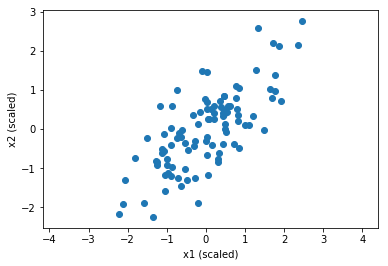

In [78]:
plt.scatter(X_scaled[:,0],X_scaled[:,1])
plt.axis('equal')
plt.xlabel('x1 (scaled)')
plt.ylabel('x2 (scaled)')
plt.show()

In [79]:
pca =PCA()

In [80]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [81]:
print(pca.components_)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


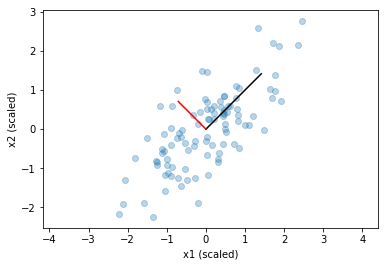

In [82]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],alpha =0.3)
plt.plot([0,2*pca.components_[0,0]], [0,2*pca.components_[0,1]],'k')
plt.plot([0,pca.components_[1,0]],[0,pca.components_[1,1]],'r')
plt.axis('equal')
plt.xlabel('x1 (scaled)')
plt.ylabel('x2 (scaled)')
plt.show()

In [83]:
PC = pca.transform(X_scaled)

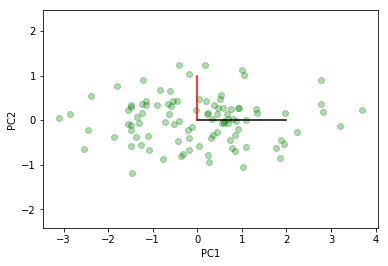

In [86]:
plt.scatter(PC[:,0],PC[:,1],alpha = 0.3,color = 'g')
plt.plot([0,2],[0,0],'k')
plt.plot([0,0],[0,1],'r')
plt.axis('equal')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [87]:
print(pca.explained_variance_ratio_)

[0.86915841 0.13084159]


In [88]:
pca = PCA(n_components=1)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [89]:
print(pca.components_ )

[[0.70710678 0.70710678]]


In [90]:
PC = pca.transform(X_scaled)

In [91]:
print(PC.shape)

(100, 1)


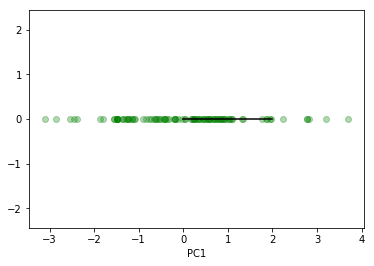

In [92]:
plt.scatter(PC[:,0],len(PC)*[0],alpha=0.3,color ='g')
plt.plot([0,2],[0,0],'k')
plt.axis('equal')
plt.xlabel('PC1')
plt.show()

In [93]:
item_data = pd.read_csv('item_data.csv',index_col=0)

In [94]:
scaler = StandardScaler()
item_data_scaled = scaler.fit_transform(item_data)
print(item_data_scaled[:5])

[[-0.13303802 -0.04920678 -0.1119152  ... -0.10482848 -0.15568183
  -0.68068072]
 [-0.13303802 -0.04920678 -0.1119152  ... -0.10482848 -0.15568183
   0.38776219]
 [-0.13303802 -0.04920678 -0.1119152  ... -0.10482848 -0.15568183
  -0.41356999]
 [-0.13303802 -0.04920678 -0.1119152  ... -0.10482848 -0.15568183
  -0.41356999]
 [-0.13303802 -0.04920678 -0.1119152  ... -0.10482848  5.53128397
   0.65487292]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [95]:
pca = PCA()
pca.fit(item_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [96]:
PC_items  =pca.transform(item_data_scaled)
print(PC_items[:5])

[[ 5.87614052e+00  4.82891689e+00 -4.95545069e-01 ... -6.62646278e-04
  -4.43629806e-05  7.79931675e-15]
 [-4.21983747e+00  1.22621722e+00 -1.88191211e+00 ... -2.11471782e-04
  -2.69154340e-04 -4.33507397e-15]
 [-1.26084676e+00  2.38766371e+00 -7.31483440e-02 ...  2.57750179e-04
  -2.05682324e-04 -5.17554749e-15]
 [-4.92931983e+00 -7.14858724e-01 -1.58093026e+00 ... -1.98603886e-03
   9.92316312e-05 -9.78991194e-15]
 [-2.05311348e+00  2.11095022e+00  1.84807021e-01 ... -3.43415269e-04
  -1.32981672e-04  2.77555756e-17]]


In [98]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

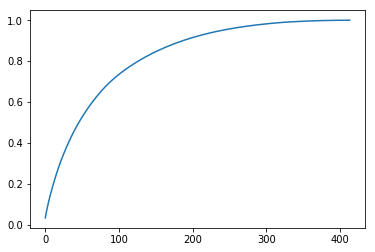

In [100]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cumulative_explained_variance)),cumulative_explained_variance)
plt.show()

In [102]:
print(cumulative_explained_variance[124])

0.7955069032205401


In [104]:
pca =PCA(n_components =125)
PC_items = pca.fit_transform(item_data_scaled)
PC_items.shape

(414, 125)

In [105]:
items_pca = pd.DataFrame(PC_items)
items_pca.columns = ['PC{}'.format(i+1) for i in range(PC_items.shape[1])]

In [106]:
items_pca.index = item_data.index

In [107]:
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,5.876141,4.828892,-0.495543,3.093843,-0.633702,-11.534085,2.161913,7.116797,5.336110,4.424089,4.636927,2.316653,12.310852,1.986991,-11.431419,5.617585,-2.176671,7.665909,-12.135775,-16.048472,-5.949797,7.814681,40.516405,-35.575430,-17.557308,6.869688,20.887952,2.297487,-26.156289,-32.582130,7.883801,12.353973,6.831575,-32.955725,-4.408426,-17.235243,-11.275285,-14.490191,-2.763643,4.734708,-6.984515,-1.460754,10.600410,1.241669,3.095624,5.331731,-0.417450,1.527353,-6.409488,3.056646,...,2.311696,2.528281,-1.020094,-1.826817,-1.782002,1.250666,0.268078,-1.713217,1.675448,-3.594813,0.524752,-1.873924,0.624251,0.238212,1.119833,-1.800831,0.666073,0.233571,-0.150078,0.842559,-0.364235,-0.573426,-0.062462,0.622033,0.037471,-0.811016,1.602420,0.104307,-0.153327,-0.251323,0.410751,-0.485748,-0.138471,1.202081,0.414028,0.565478,-0.655107,1.073001,-0.057048,0.240346,-0.007766,-0.779199,0.613359,-0.330509,-0.004962,-0.045697,0.148163,-0.061750,-0.198612,-0.269058
12348,-4.219839,1.226195,-1.881922,-0.174302,0.817768,1.160852,-0.871961,-0.846827,0.460120,0.854323,-0.401760,0.981605,-1.104198,0.770226,-0.092707,-0.313275,-0.448938,1.207543,0.381764,-0.468900,0.183725,0.054173,0.501489,0.373975,1.226069,-0.771832,-0.269968,0.851287,-0.371127,-0.578059,1.010339,-0.582769,0.946070,-0.736183,0.355560,-0.385273,-0.297174,0.397002,0.153127,0.334103,-0.458112,0.706996,1.212702,-0.199148,-0.861671,-0.067365,-0.417001,-1.614081,-0.364249,0.454946,...,-1.003771,-0.888863,-0.530779,-0.277437,0.036027,0.129662,-0.561206,-0.394906,-0.629814,0.319792,0.236758,0.148990,-1.854245,0.124591,-0.416596,-0.741901,0.207915,0.994749,-0.156038,1.087600,0.081404,0.413462,1.287041,1.002995,-0.653275,0.790626,-0.720898,-0.457527,-1.722533,-1.502235,1.066439,-0.696565,2.011565,-0.602318,-0.767082,-0.245528,0.569452,-0.933205,1.556439,-1.138468,-1.904435,0.075644,-0.955823,1.409611,0.724342,0.464916,1.907702,-1.416770,1.121250,-2.946993
12349,-1.260838,2.387828,-0.073097,-1.118903,-0.034546,-3.715325,-0.342738,-0.149002,-0.789685,-0.377883,1.568210,0.182048,0.221997,-0.050455,3.179876,-0.513626,-1.838726,0.382550,0.318497,-0.005705,-0.413850,0.456688,-0.789146,1.754879,-1.482831,0.752196,-0.917753,0.767206,0.487542,-1.349293,0.287530,0.645437,0.070297,-0.218669,-0.667523,-1.540909,0.790748,-1.412095,-0.092946,-0.922501,0.075750,-0.097580,-0.162106,0.704347,1.397955,-0.256310,-0.132071,-0.193963,0.844302,1.671131,...,2.024681,-0.915472,1.982239,0.634441,0.648187,0.191702,-1.109805,1.052615,-1.183430,-0.544985,1.395267,1.571042,-2.602249,-2.140487,1.167780,-2.044468,-2.057936,-2.018433,-1.913184,-1.861216,-0.138171,-1.027463,1.863885,0.085432,0.376080,1.989101,-1.386937,-1.450922,2.876608,-1.125522,-0.047045,-2.985383,2.003770,0.914071,-1.002057,-0.012691,2.621160,-2.022646,-0.626575,0.658062,4.595645,-4.527504,-2.370799,-3.396166,-3.419379,-1.304617,3.845541,0.807568,-4.652684,2.594639
12350,-4.929319,-0.714874,-1.581119,-0.469789,-0.116164,0.647736,0.112682,-1.336327,1.547287,-1.190830,-0.212845,1.057421,-0.474587,0.856864,-1.305032,0.243091,0.269373,1.954158,-0.229004,0.571653,-0.186408,0.904185,1.363480,0.176493,-0.261888,-0.164701,-0.682527,1.081079,-0.153103,-0.397770,0.240457,0.632403,-1.450379,-0.181967,-0.315697,-0.307000,-1.360443,-0.004263,0.585065,-0.250773,0.589736,-0.216347,0.283305,0.514181,-0.522224,-0.102391,-1.468632,0.153

In [109]:
items_pca.to_csv('pca_item_data.csv')

In [110]:
from sklearn.cluster import KMeans

In [111]:
sns.set_style('darkgrid')

In [112]:
np.random.seed(101)
x1a = np.random.normal(5,1,100)
x2a = np.random.normal(5,1,100)


In [114]:
np.random.seed(102)
x1b = np.random.normal(1,1,100)
x2b = np.random.normal(3,1,100)

In [115]:
np.random.seed(103)
x1c = np.random.normal(5,1,100)
x2c = np.random.normal(1,1,100)

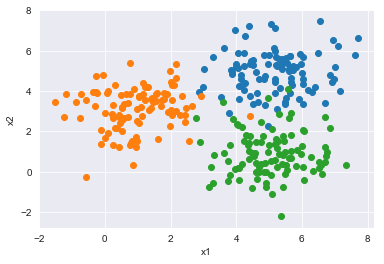

In [116]:
plt.scatter(x1a,x2a)
plt.scatter(x1b,x2b)
plt.scatter(x1c,x2c)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [118]:
x1 = np.concatenate([x1a,x1b,x1c])
x2 = np.concatenate([x2a,x2b,x2c])
print(len(x1),len(x2))

300 300


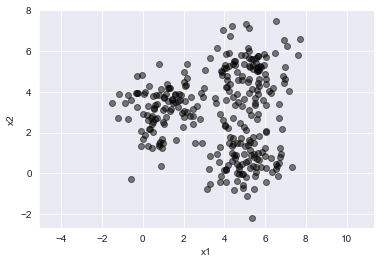

In [119]:
plt.scatter(x1,x2,color ='k',alpha =0.5)
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [120]:
X = pd.DataFrame({'x1':x1,'x2':x2})
X.head()

,x1,x2
0,7.706850,6.606780
1,5.628133,3.884290
2,5.907969,3.614621
3,5.503826,3.670340
4,5.651118,5.041460


In [121]:
kmeans = KMeans(n_clusters =3,random_state =123)

In [122]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [123]:
clustered_data = X.copy()
clustered_data['cluster'] = kmeans.predict(X)

In [125]:
clustered_data.head(10)

,x1,x2,cluster
0,7.706850,6.606780,0
1,5.628133,3.884290,0
2,5.907969,3.614621,0
3,5.503826,3.670340,0
4,5.651118,5.041460,0
5,4.680682,4.588945,0
6,4.151923,4.228671,0
7,5.605965,5.110477,0
8,2.981832,4.195348,1
9,5.740122,5.253548,0


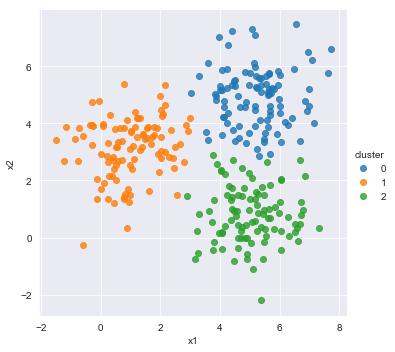

In [126]:
sns.lmplot(x ='x1',y='x2',hue ='cluster',data =clustered_data,fit_reg =False)
plt.show()

In [127]:
def fit_and_plot_kmeans(model,X):
    kmeans = model
    kmeans.fit(X)
    
    
    clustered_data  = X.copy()
    clustered_data['cluster'] = kmeans.predict(X)
    
    sns.lmplot(x='x1',y = 'x2',hue = 'cluster',data = clustered_data,fit_reg =False)
    plt.show()

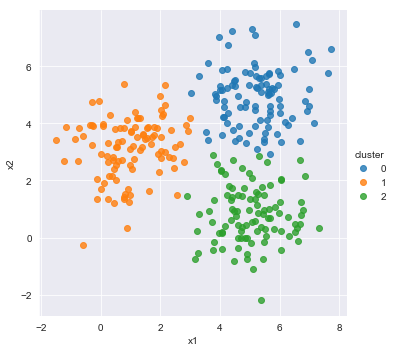

In [131]:
kmeans_iter1 =KMeans(n_clusters =3,random_state = 123,max_iter =1)
fit_and_plot_kmeans(kmeans_iter1,X)

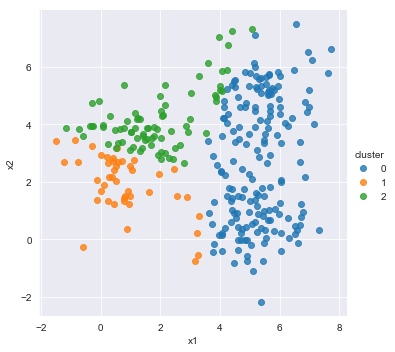

In [134]:
kmeans_iter1 =KMeans(n_clusters =3,random_state = 123,max_iter =1,n_init=1,init='random')
fit_and_plot_kmeans(kmeans_iter1,X)

Iteration 1


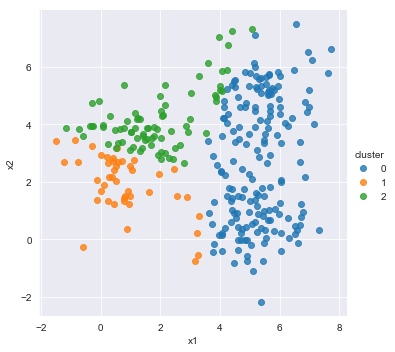

Iteration 2


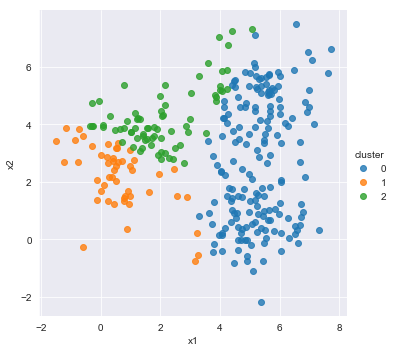

Iteration 3


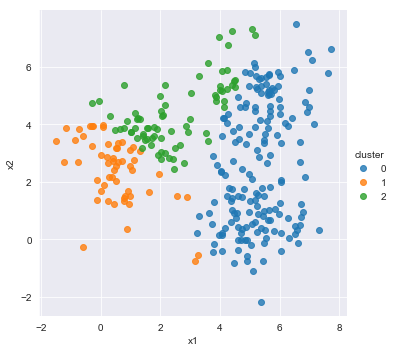

Iteration 4


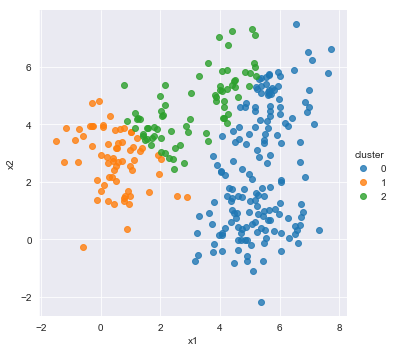

Iteration 5


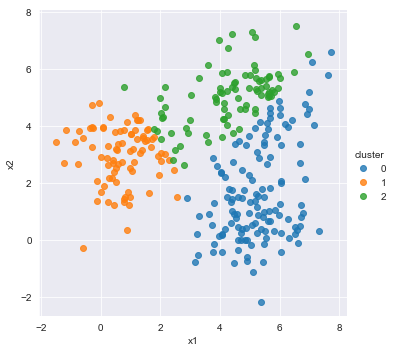

Iteration 6


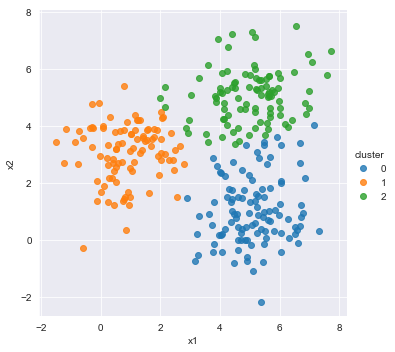

Iteration 7


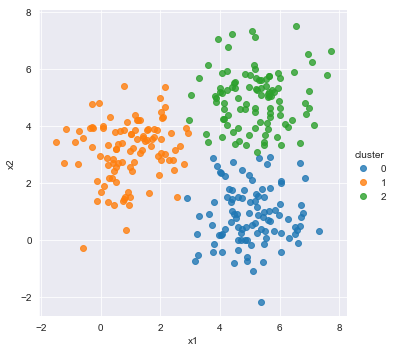

Iteration 8


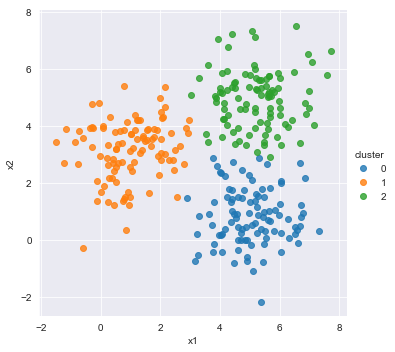

Iteration 9


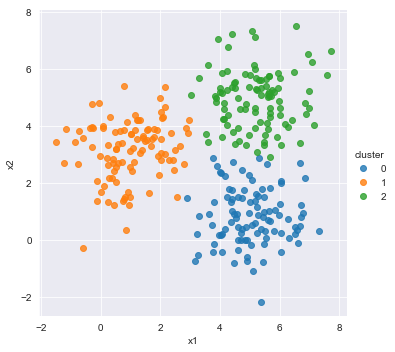

Iteration 10


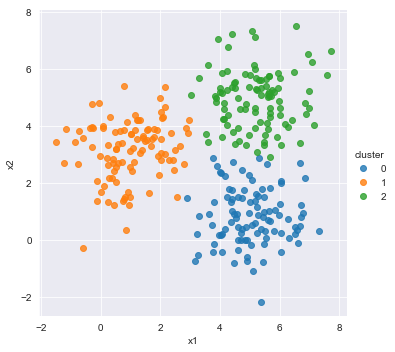

In [135]:
for max_iterations in [1,2,3,4,5,6,7,8,9,10]:
    print('Iteration',max_iterations)
    
    kmeans = KMeans(n_clusters =3,random_state =123,max_iter =max_iterations,n_init =1,init ='random')
    fit_and_plot_kmeans(kmeans,X)

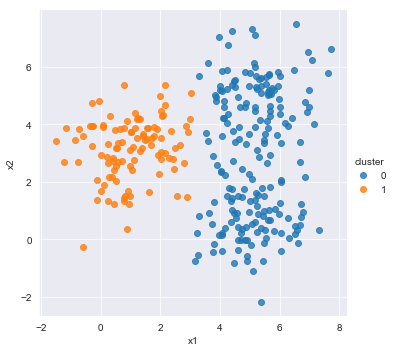

In [136]:
kmeans_iter1 =KMeans(n_clusters =2,random_state = 123,max_iter =1)
fit_and_plot_kmeans(kmeans_iter1,X)

In [137]:
base_df = pd.read_csv('abt3.csv',index_col =0)
threshold_item_data = pd.read_csv('threshold_item_data.csv',index_col =0)
pca_item_data = pd.read_csv('pca_item_data.csv',index_col=0)

In [138]:
base_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


In [139]:
threshold_item_data.head()

,22961,22630,22139,21080,85099B,20726,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
12350,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
12352,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5


In [140]:
pca_item_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,5.876141,4.828892,-0.495543,3.093843,-0.633702,-11.534085,2.161913,7.116797,5.336110,4.424089,4.636927,2.316653,12.310852,1.986991,-11.431419,5.617585,-2.176671,7.665909,-12.135775,-16.048472,-5.949797,7.814681,40.516405,-35.575430,-17.557308,6.869688,20.887952,2.297487,-26.156289,-32.582130,7.883801,12.353973,6.831575,-32.955725,-4.408426,-17.235243,-11.275285,-14.490191,-2.763643,4.734708,-6.984515,-1.460754,10.600410,1.241669,3.095624,5.331731,-0.417450,1.527353,-6.409488,3.056646,...,2.311696,2.528281,-1.020094,-1.826817,-1.782002,1.250666,0.268078,-1.713217,1.675448,-3.594813,0.524752,-1.873924,0.624251,0.238212,1.119833,-1.800831,0.666073,0.233571,-0.150078,0.842559,-0.364235,-0.573426,-0.062462,0.622033,0.037471,-0.811016,1.602420,0.104307,-0.153327,-0.251323,0.410751,-0.485748,-0.138471,1.202081,0.414028,0.565478,-0.655107,1.073001,-0.057048,0.240346,-0.007766,-0.779199,0.613359,-0.330509,-0.004962,-0.045697,0.148163,-0.061750,-0.198612,-0.269058
12348,-4.219839,1.226195,-1.881922,-0.174302,0.817768,1.160852,-0.871961,-0.846827,0.460120,0.854323,-0.401760,0.981605,-1.104198,0.770226,-0.092707,-0.313275,-0.448938,1.207543,0.381764,-0.468900,0.183725,0.054173,0.501489,0.373975,1.226069,-0.771832,-0.269968,0.851287,-0.371127,-0.578059,1.010339,-0.582769,0.946070,-0.736183,0.355560,-0.385273,-0.297174,0.397002,0.153127,0.334103,-0.458112,0.706996,1.212702,-0.199148,-0.861671,-0.067365,-0.417001,-1.614081,-0.364249,0.454946,...,-1.003771,-0.888863,-0.530779,-0.277437,0.036027,0.129662,-0.561206,-0.394906,-0.629814,0.319792,0.236758,0.148990,-1.854245,0.124591,-0.416596,-0.741901,0.207915,0.994749,-0.156038,1.087600,0.081404,0.413462,1.287041,1.002995,-0.653275,0.790626,-0.720898,-0.457527,-1.722533,-1.502235,1.066439,-0.696565,2.011565,-0.602318,-0.767082,-0.245528,0.569452,-0.933205,1.556439,-1.138468,-1.904435,0.075644,-0.955823,1.409611,0.724342,0.464916,1.907702,-1.416770,1.121250,-2.946993
12349,-1.260838,2.387828,-0.073097,-1.118903,-0.034546,-3.715325,-0.342738,-0.149002,-0.789685,-0.377883,1.568210,0.182048,0.221997,-0.050455,3.179876,-0.513626,-1.838726,0.382550,0.318497,-0.005705,-0.413850,0.456688,-0.789146,1.754879,-1.482831,0.752196,-0.917753,0.767206,0.487542,-1.349293,0.287530,0.645437,0.070297,-0.218669,-0.667523,-1.540909,0.790748,-1.412095,-0.092946,-0.922501,0.075750,-0.097580,-0.162106,0.704347,1.397955,-0.256310,-0.132071,-0.193963,0.844302,1.671131,...,2.024681,-0.915472,1.982239,0.634441,0.648187,0.191702,-1.109805,1.052615,-1.183430,-0.544985,1.395267,1.571042,-2.602249,-2.140487,1.167780,-2.044468,-2.057936,-2.018433,-1.913184,-1.861216,-0.138171,-1.027463,1.863885,0.085432,0.376080,1.989101,-1.386937,-1.450922,2.876608,-1.125522,-0.047045,-2.985383,2.003770,0.914071,-1.002057,-0.012691,2.621160,-2.022646,-0.626575,0.658062,4.595645,-4.527504,-2.370799,-3.396166,-3.419379,-1.304617,3.845541,0.807568,-4.652684,2.594639
12350,-4.929319,-0.714874,-1.581119,-0.469789,-0.116164,0.647736,0.112682,-1.336327,1.547287,-1.190830,-0.212845,1.057421,-0.474587,0.856864,-1.305032,0.243091,0.269373,1.954158,-0.229004,0.571653,-0.186408,0.904185,1.363480,0.176493,-0.261888,-0.164701,-0.682527,1.081079,-0.153103,-0.397770,0.240457,0.632403,-1.450379,-0.181967,-0.315697,-0.307000,-1.360443,-0.004263,0.585065,-0.250773,0.589736,-0.216347,0.283305,0.514181,-0.522224,-0.102391,-1.468632,0.153

In [141]:
threshold_df = base_df.join(threshold_item_data)
threshold_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22961,22630,22139,21080,85099B,20726,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5


In [142]:
pca_df = base_df.join(pca_item_data)
pca_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.876141,4.828892,-0.495543,3.093843,-0.633702,-11.534085,2.161913,7.116797,5.336110,4.424089,4.636927,2.316653,12.310852,1.986991,-11.431419,5.617585,-2.176671,7.665909,-12.135775,-16.048472,-5.949797,7.814681,40.516405,-35.575430,-17.557308,6.869688,20.887952,2.297487,-26.156289,-32.582130,7.883801,12.353973,6.831575,-32.955725,-4.408426,-17.235243,-11.275285,-14.490191,-2.763643,4.734708,-6.984515,-1.460754,...,2.311696,2.528281,-1.020094,-1.826817,-1.782002,1.250666,0.268078,-1.713217,1.675448,-3.594813,0.524752,-1.873924,0.624251,0.238212,1.119833,-1.800831,0.666073,0.233571,-0.150078,0.842559,-0.364235,-0.573426,-0.062462,0.622033,0.037471,-0.811016,1.602420,0.104307,-0.153327,-0.251323,0.410751,-0.485748,-0.138471,1.202081,0.414028,0.565478,-0.655107,1.073001,-0.057048,0.240346,-0.007766,-0.779199,0.613359,-0.330509,-0.004962,-0.045697,0.148163,-0.061750,-0.198612,-0.269058
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.219839,1.226195,-1.881922,-0.174302,0.817768,1.160852,-0.871961,-0.846827,0.460120,0.854323,-0.401760,0.981605,-1.104198,0.770226,-0.092707,-0.313275,-0.448938,1.207543,0.381764,-0.468900,0.183725,0.054173,0.501489,0.373975,1.226069,-0.771832,-0.269968,0.851287,-0.371127,-0.578059,1.010339,-0.582769,0.946070,-0.736183,0.355560,-0.385273,-0.297174,0.397002,0.153127,0.334103,-0.458112,0.706996,...,-1.003771,-0.888863,-0.530779,-0.277437,0.036027,0.129662,-0.561206,-0.394906,-0.629814,0.319792,0.236758,0.148990,-1.854245,0.124591,-0.416596,-0.741901,0.207915,0.994749,-0.156038,1.087600,0.081404,0.413462,1.287041,1.002995,-0.653275,0.790626,-0.720898,-0.457527,-1.722533,-1.502235,1.066439,-0.696565,2.011565,-0.602318,-0.767082,-0.245528,0.569452,-0.933205,1.556439,-1.138468,-1.904435,0.075644,-0.955823,1.409611,0.724342,0.464916,1.907702,-1.416770,1.121250,-2.946993
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260838,2.387828,-0.073097,-1.118903,-0.034546,-3.715325,-0.342738,-0.149002,-0.789685,-0.377883,1.568210,0.182048,0.221997,-0.050455,3.179876,-0.513626,-1.838726,0.382550,0.318497,-0.005705,-0.413850,0.456688,-0.789146,1.754879,-1.482831,0.752196,-0.917753,0.767206,0.487542,-1.349293,0.287530,0.645437,0.070297,-0.218669,-0.667523,-1.540909,0.790748,-1.412095,-0.092946,-0.922501,0.075750,-0.097580,...,2.024681,-0.915472,1.982239,0.634441,0.648187,0.191702,-1.109805,1.052615,-1.183430,-0.544985,1.395267,1.571042,-2.602249,-2.140487,1.167780,-2.044468,-2.057936,-2.018433,-1.913184,-1.861216,-0.138171,-1.027463,1.863885,0.085432,0.376080,1.989101,-1.386937,-1.450922,2.876608,-1.125522,-0.047045,-2.985383,2.003770,0.914071,-1.002057,-0.012691,2.621160,-2.022646,-0.626575,0.658062,4.595645,-4.527504,-2.370799,-3.396166,-3.419379,-1.304617,3.845541,0.807568,-4.652684,2.594639
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929319,-0.714874,-1.581119,-0.469789,-0.116164,0.647736,0.112682,-1.336327,1.547287,-1.190830,-0.212845,1.057421,-0.474587,0.856864,-1.305032,0.243091,0.269373,1.954158,-0.229004,0.571653,-0.186408,0.904185,1.363480,0.176493,-0.261888,-0.164701,-0.682527,1.081079,-0.153103,-0.397770,0.240457,0.632403,-1.450379,-0.181967,-0.315697,-0.307000,-1.360443,-0.004263,0.585065,-0.250773,0

In [143]:
base_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
k_means = make_pipeline(StandardScaler(),KMeans(n_clusters =3,random_state =123))

In [147]:
k_means.fit(base_df)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [150]:
base_df['cluster'] = k_means.predict(base_df)
base_df.head()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,cluster
CustomerID,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,1
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0


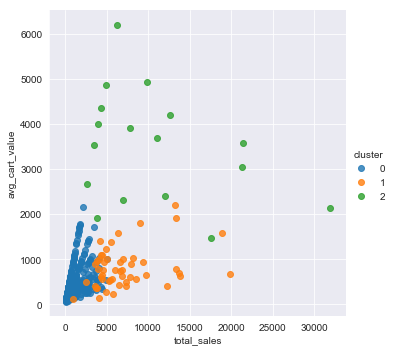

In [152]:
sns.lmplot(x ='total_sales',y ='avg_cart_value',hue ='cluster',data =base_df,fit_reg =False)
plt.show()

In [153]:
k_means = make_pipeline(StandardScaler(),KMeans(n_clusters =3,random_state =123))

In [155]:
k_means.fit(threshold_df)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [157]:
threshold_df['cluster']= k_means.predict(threshold_df)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [158]:
threshold_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22961,22630,22139,21080,85099B,20726,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5,2


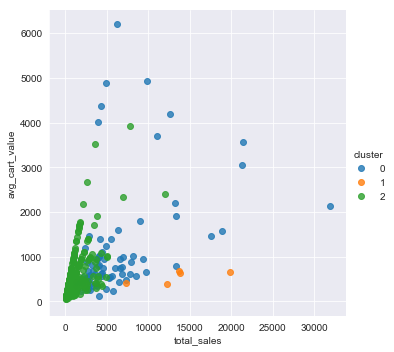

In [159]:
sns.lmplot(x ='total_sales',y ='avg_cart_value',hue ='cluster',data =threshold_df,fit_reg =False)
plt.show()

In [160]:
k_means = make_pipeline(StandardScaler(),KMeans(n_clusters =3,random_state =123))
k_means.fit(pca_df)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [161]:
pca_df['cluster']= k_means.predict(pca_df)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [162]:
pca_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,...,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.876141,4.828892,-0.495543,3.093843,-0.633702,-11.534085,2.161913,7.116797,5.336110,4.424089,4.636927,2.316653,12.310852,1.986991,-11.431419,5.617585,-2.176671,7.665909,-12.135775,-16.048472,-5.949797,7.814681,40.516405,-35.575430,-17.557308,6.869688,20.887952,2.297487,-26.156289,-32.582130,7.883801,12.353973,6.831575,-32.955725,-4.408426,-17.235243,-11.275285,-14.490191,-2.763643,4.734708,-6.984515,-1.460754,...,2.528281,-1.020094,-1.826817,-1.782002,1.250666,0.268078,-1.713217,1.675448,-3.594813,0.524752,-1.873924,0.624251,0.238212,1.119833,-1.800831,0.666073,0.233571,-0.150078,0.842559,-0.364235,-0.573426,-0.062462,0.622033,0.037471,-0.811016,1.602420,0.104307,-0.153327,-0.251323,0.410751,-0.485748,-0.138471,1.202081,0.414028,0.565478,-0.655107,1.073001,-0.057048,0.240346,-0.007766,-0.779199,0.613359,-0.330509,-0.004962,-0.045697,0.148163,-0.061750,-0.198612,-0.269058,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.219839,1.226195,-1.881922,-0.174302,0.817768,1.160852,-0.871961,-0.846827,0.460120,0.854323,-0.401760,0.981605,-1.104198,0.770226,-0.092707,-0.313275,-0.448938,1.207543,0.381764,-0.468900,0.183725,0.054173,0.501489,0.373975,1.226069,-0.771832,-0.269968,0.851287,-0.371127,-0.578059,1.010339,-0.582769,0.946070,-0.736183,0.355560,-0.385273,-0.297174,0.397002,0.153127,0.334103,-0.458112,0.706996,...,-0.888863,-0.530779,-0.277437,0.036027,0.129662,-0.561206,-0.394906,-0.629814,0.319792,0.236758,0.148990,-1.854245,0.124591,-0.416596,-0.741901,0.207915,0.994749,-0.156038,1.087600,0.081404,0.413462,1.287041,1.002995,-0.653275,0.790626,-0.720898,-0.457527,-1.722533,-1.502235,1.066439,-0.696565,2.011565,-0.602318,-0.767082,-0.245528,0.569452,-0.933205,1.556439,-1.138468,-1.904435,0.075644,-0.955823,1.409611,0.724342,0.464916,1.907702,-1.416770,1.121250,-2.946993,0
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260838,2.387828,-0.073097,-1.118903,-0.034546,-3.715325,-0.342738,-0.149002,-0.789685,-0.377883,1.568210,0.182048,0.221997,-0.050455,3.179876,-0.513626,-1.838726,0.382550,0.318497,-0.005705,-0.413850,0.456688,-0.789146,1.754879,-1.482831,0.752196,-0.917753,0.767206,0.487542,-1.349293,0.287530,0.645437,0.070297,-0.218669,-0.667523,-1.540909,0.790748,-1.412095,-0.092946,-0.922501,0.075750,-0.097580,...,-0.915472,1.982239,0.634441,0.648187,0.191702,-1.109805,1.052615,-1.183430,-0.544985,1.395267,1.571042,-2.602249,-2.140487,1.167780,-2.044468,-2.057936,-2.018433,-1.913184,-1.861216,-0.138171,-1.027463,1.863885,0.085432,0.376080,1.989101,-1.386937,-1.450922,2.876608,-1.125522,-0.047045,-2.985383,2.003770,0.914071,-1.002057,-0.012691,2.621160,-2.022646,-0.626575,0.658062,4.595645,-4.527504,-2.370799,-3.396166,-3.419379,-1.304617,3.845541,0.807568,-4.652684,2.594639,0
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929319,-0.714874,-1.581119,-0.469789,-0.116164,0.647736,0.112682,-1.336327,1.547287,-1.190830,-0.212845,1.057421,-0.474587,0.856864,-1.305032,0.243091,0.269373,1.954158,-0.229004,0.571653,-0.186408,0.904185,1.363480,0.176493,-0.261888,-0.164701,-0.682527,1.081079,-0.153103,-0.397770,0.240457,0.632403,-1.450379,-0.181967,-0.315697,-0.307000,-1.360443,-0.004263,0.585065,-0.250773,0.589736,-0.216347,.

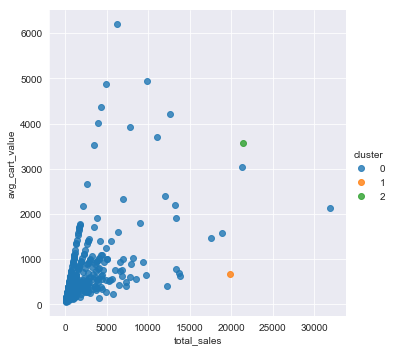

In [163]:
sns.lmplot(x ='total_sales',y ='avg_cart_value',hue ='cluster',data =pca_df,fit_reg =False)
plt.show()

In [168]:
from sklearn.metrics import adjusted_rand_score

In [169]:
adjusted_rand_score(base_df.cluster,threshold_df.cluster)

0.6021354951782343

In [170]:
adjusted_rand_score(base_df.cluster,pca_df.cluster)

0.042311307744307906

In [171]:
adjusted_rand_score(pca_df.cluster,threshold_df.cluster)

0.033220422032313936